# Линейные модели в машинном обучении

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
средний удой за год — не менее 6000 килограммов;
молоко должно быть вкусным.


**Описание данных**
* Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 
    Описание данных:
    * id — уникальный идентификатор коровы.
    * Удой, кг — масса молока, которую корова даёт в год (в килограммах).
    * ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    * Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    * СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    * Порода — порода коровы.
    * Тип пастбища — ландшафт лугов, на которых паслась корова.
    * порода папы_быка — порода папы коровы.
    * Жирность,% — содержание жиров в молоке (в процентах).
    * Белок,% — содержание белков в молоке (в процентах).
    * Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    * Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    * Признаки в датасете ferma_main.csv можно разделить на группы.
    * Характеристики коровы: id, Порода, порода папы_быка, Возраст.
    * Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
    * Характеристика пастбища: Тип пастбища.
    * Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
* Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.
* Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.
* Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
    * Порода — порода коровы.
    * Тип пастбища — ландшафт лугов, на которых паслась корова.
    * порода папы_быка — порода папы коровы.
    * Имя_папы — имя папы коровы.
    * Текущая_жирность,% — содержание жиров в молоке (в процентах).
    * Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    * Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

**План работы:**
* 1.Загрузим данные и изучим их
* 2.Сделаем предобработку данных
* 3.Проведем исследовательский анализ данных
* 4.Проведем корреляциооный анализ данных
* 5.Решим задачу регрессии
* 6.Решим задачу классификации
* 7.Сделаем итоговые выводы 

**Загрузим необходимые библиотеки**

In [1040]:
import pandas as pd
!pip install phik
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score, precision_score,recall_score, confusion_matrix, precision_recall_curve
from scipy import stats as st
import math

## 1. Загрузка данных

Загрузим датасеты

In [1041]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv',sep=';',decimal=',')
except:
    ferma_main = pd.read_csv('ferma_main.csv', sep=';', decimal=',')
    ferma_dad = pd.read_csv('ferma_dad.csv', sep=';', decimal=',')
    cow_buy = pd.read_csv('cow_buy.csv',sep=';',decimal=',')

Создадим функцию которая позволит выводить общую информацию о датасете

In [1042]:
def df_info(df):
    display(df.head())
    print('Общая информация')
    display(df.info())
    display(df.describe().T)
    print('Выведем количество пропусков и явных дубликтов')
    display((df.isna().mean() * 100).sort_values(ascending=False))
    print('Количество явных дубликатов:')
    display(df.duplicated().sum())
    display(df.shape)

Просмотрим общую информацию для каждого датафрейма

In [1043]:
df_info(ferma_main)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    ob

None

,count,mean,std,min,25%,50%,75%,max
id,634.0,317.460568,183.096982,1.000,159.250,317.500,475.750,629.000
"Удой, кг",634.0,6187.025237,1638.401021,5204.000,5751.750,6130.500,6501.000,45616.000
ЭКЕ (Энергетическая кормовая единица),634.0,14.542744,1.301301,10.900,13.500,14.700,15.600,16.800
"Сырой протеин, г",634.0,1922.682965,182.392548,1660.000,1772.250,1880.500,2058.750,2349.000
СПО (Сахаро-протеиновое соотношение),634.0,0.912855,0.032209,0.840,0.890,0.930,0.940,0.960
"Жирность,%",634.0,3.603943,0.168020,2.990,3.590,3.650,3.720,3.750
"Белок,%",634.0,3.075666,0.002540,3.069,3.074,3.076,3.077,3.085


Выведем количество пропусков и явных дубликтов


id                                       0.0
Удой, кг                                 0.0
ЭКЕ (Энергетическая кормовая единица)    0.0
Сырой протеин, г                         0.0
СПО (Сахаро-протеиновое соотношение)     0.0
Порода                                   0.0
Тип пастбища                             0.0
порода папы_быка                         0.0
Жирность,%                               0.0
Белок,%                                  0.0
Вкус молока                              0.0
Возраст                                  0.0
dtype: float64

Количество явных дубликатов:


5

(634, 12)

In [1044]:
df_info(ferma_dad)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


Выведем количество пропусков и явных дубликтов


id          0.0
Имя Папы    0.0
dtype: float64

Количество явных дубликатов:


0

(629, 2)

In [1045]:
df_info(cow_buy)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

,count,mean,std,min,25%,50%,75%,max
"Текущая_жирность,%",20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
"Текущий_уровень_белок,%",20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


Выведем количество пропусков и явных дубликтов


Порода                     0.0
Тип пастбища               0.0
порода папы_быка           0.0
Имя_папы                   0.0
Текущая_жирность,%         0.0
Текущий_уровень_белок,%    0.0
Возраст                    0.0
dtype: float64

Количество явных дубликатов:


4

(20, 7)

**Общий вывод по информации о данных**
* Датафрейм ferma_main
    *  Состоит из 634 строк и 12 столбцов
    *  Значения соответствуют типам данных
    *  Пропуски не обнаружены
    *  **Количество явных дубликатов: 5** 
    *  **Стоит поменять названия столбцов и привести их к одному стилю**
* Датафрейм ferma_dad
    * Состоит из 629 строк и 2 столбцов
    * Значения соответствуют типам данных
    * Пропуски не обнаружены
    * Дубликаты не обнаружены
    *  **Стоит поменять названия столбцов и привести их к одному стилю**
* Датафрейм cow_buy
    * Состоит из 20 строк и 7 столбцов
    * Значения соответствуют типам данных
    * Пропуски не обнаружены
    * **Количество явных дубликатов: 4**
    * **Стоит поменять названия столбцов и привести их к одному стилю**  

## 2.Предобработка данных

### 2.1 Переименуем названия столбцов

In [1046]:
ferma_main.rename(columns={
    'Удой, кг':'удой',
    'ЭКЕ (Энергетическая кормовая единица)':'эке',
    'Сырой протеин, г':'сырой_протеин',
    'СПО (Сахаро-протеиновое соотношение)':'спо',
    'Порода':'порода',
    'Тип пастбища':'тип_пастбища',
    'порода папы_быка':'порода_папы',
    'Жирность,%':'жирность',
    'Белок,%':'белок',
    'Вкус молока':'вкус_молока',
    'Возраст':'возраст',
}, inplace=True)
ferma_dad.rename(columns={'Имя Папы':'имя_папы'}, inplace=True)
cow_buy.rename(columns={
    'Порода':'порода',
    'Тип пастбища':'тип_пастбища',
    'порода папы_быка':'порода_папы',
    'Имя_папы':'имя_папы',
    'Текущая_жирность,%':'текущая_жирность',
    'Текущий_уровень_белок,%':'текущий_белок',
    'Возраст':'возраст',
}, inplace=True)
display(ferma_main.head(1))
display(ferma_dad.head(1))
display(cow_buy.head(1))

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет


,id,имя_папы
0,1,Буйный


,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет


Теперь названия столбцов выведены в правильном формате

### 2.2 Работа с дубликатами

Мы знаем что в датафреймах ferma_main и cow_buy есть явные дубликаты,стоит просмотреть и неявные

In [1047]:
unique_values_ferma = {col: ferma_main[col].unique() for col in ferma_main.select_dtypes(include=['object']).columns}
unique_values_ferma

{'порода': array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object),
 'тип_пастбища': array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object),
 'порода_папы': array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object),
 'вкус_молока': array(['вкусно', 'не вкусно'], dtype=object),
 'возраст': array(['более_2_лет', 'менее_2_лет'], dtype=object)}

In [1048]:
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [1049]:
unique_values_cow = {col: cow_buy[col].unique() for col in cow_buy.select_dtypes(include=['object']).columns}
unique_values_cow

{'порода': array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object),
 'тип_пастбища': array(['холмистое', 'равнинное'], dtype=object),
 'порода_папы': array(['Айдиал', 'Соверин'], dtype=object),
 'имя_папы': array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object),
 'возраст': array(['более_2_лет', 'менее_2_лет'], dtype=object)}

* В датафрейме ferma_main можно заметить дубликаты 'Равнинное', 'Равнинные', 'Айдиал', 'Айдиалл'
* В датафрейме ferma_dad неявные дубликаты отсутствуют
* В датафрейме cow_buy можно попробовать изменить регистр первой буквы для столбца 'тип пастбища', столбец будет похож на столбец в ferma_main,будет не лишним.

In [1050]:
ferma_main['тип_пастбища'].replace({'Равнинные': 'Равнинное'}, inplace=True)
ferma_main['порода_папы'].replace({'Айдиалл': 'Айдиал'}, inplace=True)
cow_buy['тип_пастбища'].replace({'холмистое':'Холмистое','равнинное':'Равнинное'},inplace=True)
# Проверим 
display(ferma_main['тип_пастбища'].unique())
display(ferma_main['порода_папы'].unique())
display(cow_buy['тип_пастбища'].unique())

array(['Равнинное', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

array(['Холмистое', 'Равнинное'], dtype=object)

И наконец разберемся с явными дубликатами

In [1051]:
ferma_main.drop_duplicates(inplace=True)
cow_buy.drop_duplicates(inplace=True)
print('Количество явных дубликатов после изменений в датафрейме ferma_main',ferma_main.duplicated().sum())
print('Количество явных дубликатов после изменений в датафрейме cow_buy',cow_buy.duplicated().sum())

Количество явных дубликатов после изменений в датафрейме ferma_main 0
Количество явных дубликатов после изменений в датафрейме cow_buy 0


**Общий вывод по предобработке данных**
* Выявлены и изменены неявные дубликаты в датафрейме ferma_main
* В датафрейме cow_buy были изменены значения,а именно первые буквы были переведены в верхний регист,для дальнейшего удобства
* Удалены явные дубликаты в датафреймах ferma_main и cow_buy

Данные готовы к использованию!

## 3 Исследовательский анализ данных

Выведем общую информацию о данных снова

In [1052]:
display(ferma_main.info())
display(ferma_main.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             629 non-null    int64  
 1   удой           629 non-null    int64  
 2   эке            629 non-null    float64
 3   сырой_протеин  629 non-null    int64  
 4   спо            629 non-null    float64
 5   порода         629 non-null    object 
 6   тип_пастбища   629 non-null    object 
 7   порода_папы    629 non-null    object 
 8   жирность       629 non-null    float64
 9   белок          629 non-null    float64
 10  вкус_молока    629 non-null    object 
 11  возраст        629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


В датафрейме ferma_main есть как колличественные так и категориальные признаки,раздели эти действия и будем рассматривать каждый признак подробно, дабы выявить выбросы и ознакомиться с данными
* Количественные признаки: удой, эке, сырой протеин, спо, жирность, белок
* Категориальные признаки: порода, тип пастбища, порода папы, вкус молока, возраст

### 3.1 Категориальные признаки

#### Просмотрим процентные соотношения всех признаков

In [1053]:
def display_value_counts_percent(df, columns):
    for column in columns:
        if column in df.columns:
            print(f"Процентное распределение для столбца '{column}':")
            display(df[column].value_counts(normalize=True) * 100)
            display(df[column].value_counts())
            print('')
            print('')
        else:
            print(f"Столбец '{column}' не найден")

columns_to_analyze = ['порода', 'тип_пастбища', 'порода_папы', 'вкус_молока', 'возраст']

display_value_counts_percent(ferma_main, columns_to_analyze)

Процентное распределение для столбца 'порода':


Вис Бик Айдиал     59.300477
РефлешнСоверинг    40.699523
Name: порода, dtype: float64

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: порода, dtype: int64



Процентное распределение для столбца 'тип_пастбища':


Холмистое    55.802862
Равнинное    44.197138
Name: тип_пастбища, dtype: float64

Холмистое    351
Равнинное    278
Name: тип_пастбища, dtype: int64



Процентное распределение для столбца 'порода_папы':


Айдиал     50.556439
Соверин    49.443561
Name: порода_папы, dtype: float64

Айдиал     318
Соверин    311
Name: порода_папы, dtype: int64



Процентное распределение для столбца 'вкус_молока':


вкусно       58.982512
не вкусно    41.017488
Name: вкус_молока, dtype: float64

вкусно       371
не вкусно    258
Name: вкус_молока, dtype: int64



Процентное распределение для столбца 'возраст':


более_2_лет    82.511924
менее_2_лет    17.488076
Name: возраст, dtype: float64

более_2_лет    519
менее_2_лет    110
Name: возраст, dtype: int64

Теперь построим графики распределения для каждого категориального признака

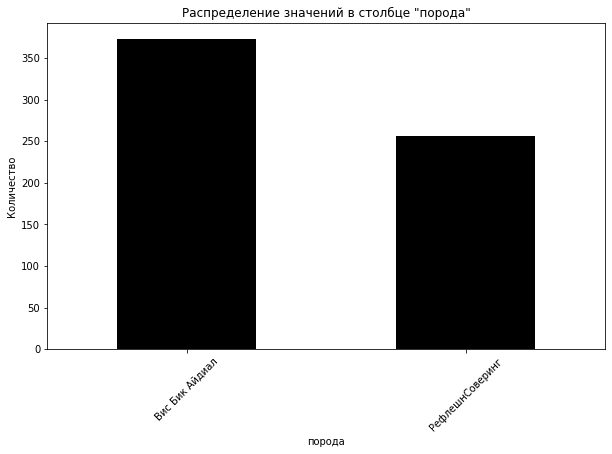

None

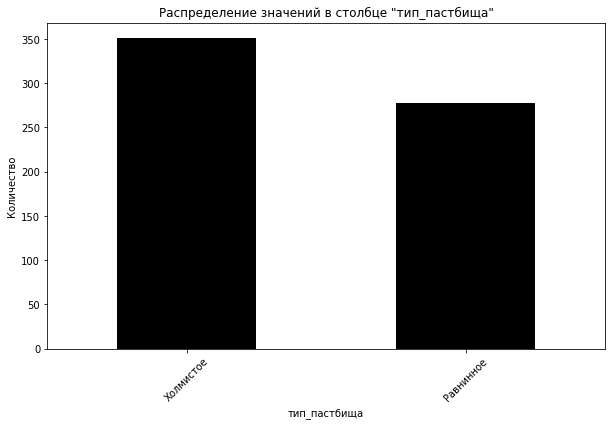

None

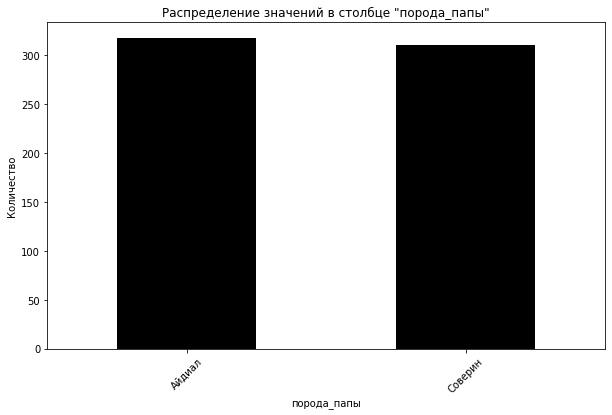

None

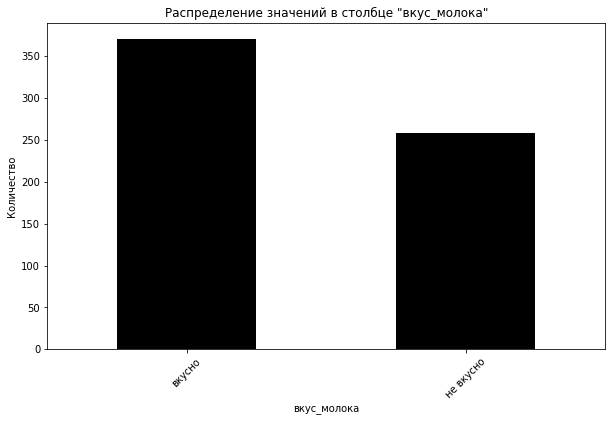

None

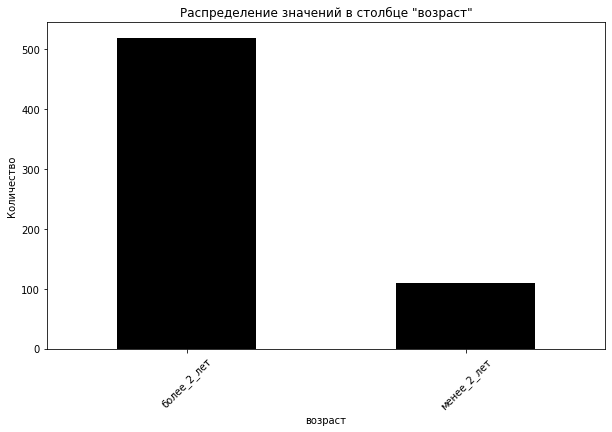

None

In [1054]:
def plot_value_counts(df, column):
    if column in df.columns:
        df[column].value_counts().plot(kind='bar', figsize=(10, 6), color='black')
        plt.xlabel(column)
        plt.ylabel('Количество')
        plt.title(f'Распределение значений в столбце "{column}"')
        plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшей читаемости
        plt.show()
    else:
        print(f"Столбец '{column}' не найден в DataFrame.")

display(plot_value_counts(ferma_main, 'порода'))
display(plot_value_counts(ferma_main, 'тип_пастбища'))
display(plot_value_counts(ferma_main, 'порода_папы'))
display(plot_value_counts(ferma_main, 'вкус_молока'))
display(plot_value_counts(ferma_main, 'возраст'))

**Общий вывод по категориальным признакам**
* Признак: порода
    * Распределение пород нормальное и стремится к соотношению 1:1
    * Вис Бик Айдиал - 373 записи(59.3%), а РефлешнСоверинг - 256 записей(40.7%)
    * С данными никакие действия не будем делать
* Признак: тип пастбища
    * Распределение по типу пастбищ еще сильнее стремится к соотношению 1 к 1.
    * Холмистая - 351 запись(55.8%), равнинная - 278 записей(44.2%)
    * С данными ничего делать не будем
* Признак: порода папы
    * Распределение по породе папы вовсе близко к соотношению 1 к 1.
    * Айдиал - 318 записей(50.6%), Соверин - 311 записей(49.4%)
    * Данные не меняем
* Признак: вкус молока
    * Распределение,конечно, далеко от распределение 1 к 1, но приемлимо, чтобы не проводить никаких изменений с данными
    * Вкусно - 371 запись(58.99%), не вкусно - 258 записей (41.01%)
* Признак: возраст
    * Распределение связано скорее всего с тем, что на ферме, молодых животных просто напросто меньше, чем тех кто живет уже там давно.
    * Более 2 лет - 519 записей(82.5%), менее 2 лет - 110 записей(17.4%)
      
**Распределение по всем категориальным признакам приемлимое, данные менять не будем, выбросов по количеству какого то определенного признака не наблюдается**

### 3.2 Количественные признаки

#### Признак - удой

In [1055]:
ferma_main['удой'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, dtype: float64

Есть сомнения по поводу 45616 кг,примем к сведению

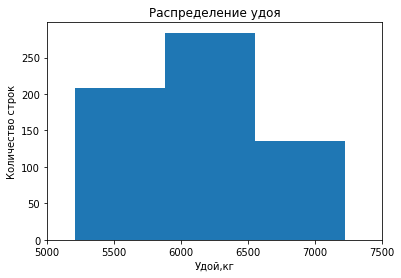

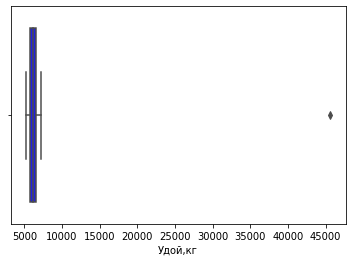

In [1056]:
ferma_main['удой'].plot(kind='hist',bins = 60)
plt.xlim(5000,7500)
plt.xlabel('Удой,кг')
plt.ylabel('Количество строк')
plt.title('Распределение удоя')
plt.show()
sns.boxplot(x=ferma_main['удой'], color='blue')
plt.xlabel('Удой,кг')
plt.show()

Избавимся от аномального значения

In [1057]:
ferma_main = ferma_main.query('удой != 45616')
# Проверим
ferma_main['удой'].sort_values(ascending=False).head()

70     7222
135    7207
296    7201
294    7197
593    7174
Name: удой, dtype: int64

**Вывод**
* Избавились от выброса,в среднем строки имеют значение  6125.9
* Само распределение стремится к нормальному

#### Признак - ЭКЕ

In [1058]:
ferma_main['эке'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

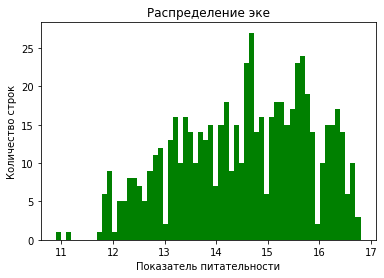

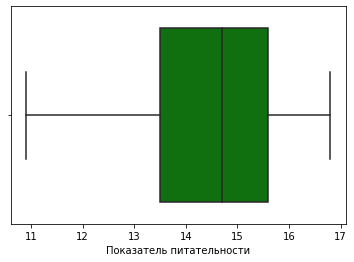

In [1059]:
ferma_main['эке'].plot(kind='hist',bins = 60,color = 'g',)
plt.xlabel('Показатель питательности')
plt.ylabel('Количество строк')
plt.title('Распределение эке')
plt.show()
sns.boxplot(x=ferma_main['эке'],color='g')
plt.xlabel('Показатель питательности')
plt.show()

**Вывод**
* Аномальные значения отсутствуют,в среднем строки имеют значение 14.5
* Распределение признака стремится к нормальному, данные готовы

### Признак - сырой протеин

In [1060]:
ferma_main['сырой_протеин'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин, dtype: float64

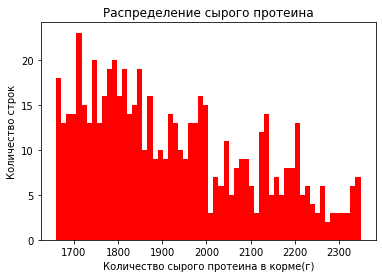

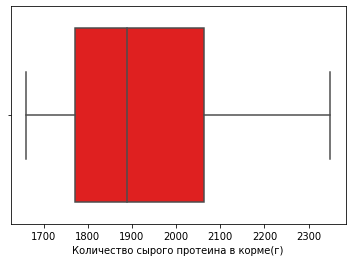

In [1061]:
ferma_main['сырой_протеин'].plot(kind='hist',bins = 60,color = 'r',)
plt.xlabel('Количество сырого протеина в корме(г)')
plt.ylabel('Количество строк')
plt.title('Распределение сырого протеина')
plt.show()
sns.boxplot(x=ferma_main['сырой_протеин'],color='r')
plt.xlabel('Количество сырого протеина в корме(г)')
plt.show()

**Вывод**
* Распределение стремится тоже к нормальному,но при этом, строк где количество сырого протеина меньше 2100 г, больше.
* Выбросы отсутствуют,в среднем строки имеют значение 1923.7

#### Признак - СПО

In [1062]:
ferma_main['спо'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

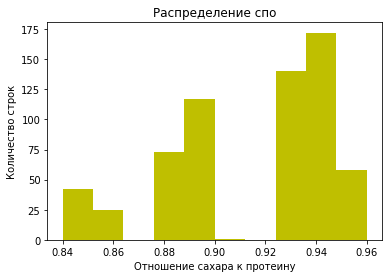

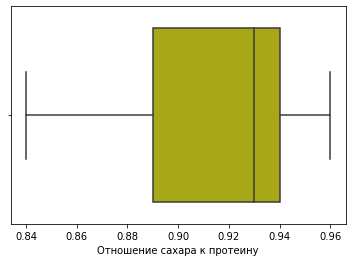

In [1063]:
ferma_main['спо'].plot(kind='hist',bins = 10,color = 'y',)
plt.xlabel('Отношение сахара к протеину')
plt.ylabel('Количество строк')
plt.title('Распределение спо')
plt.show()
sns.boxplot(x=ferma_main['спо'],color='y')
plt.xlabel('Отношение сахара к протеину')
plt.show()

**Вывод**
* Распределение хоть и скорее всего не нормальное, но данный момент можно списать на то, что это показатель отношения одного к другому.
* Аномальные значения отсутствуют, в среднем строки имеют значение 0.913089

#### Признак - жирность

In [1064]:
ferma_main['жирность'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

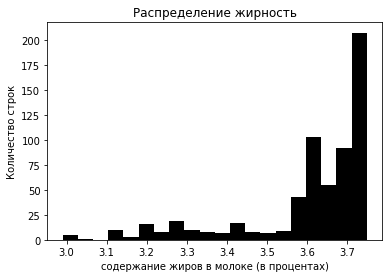

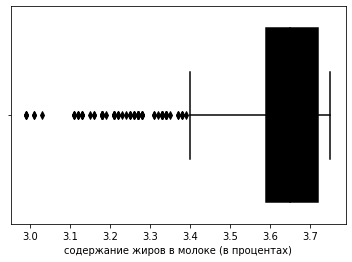

In [1065]:
ferma_main['жирность'].plot(kind='hist',bins = 20,color = 'black',)
plt.xlabel('содержание жиров в молоке (в процентах)')
plt.ylabel('Количество строк')
plt.title('Распределение жирность')
plt.show()
sns.boxplot(x=ferma_main['жирность'],color='black')
plt.xlabel('содержание жиров в молоке (в процентах)')
plt.show()

На графике 'ящик с усами', можно увидеть выбросы,просмотрим какую долю составляют эти выбросы.

In [1066]:
round((ferma_main['жирность'] < 3.4).mean() * 100,2)

13.69

**Вывод**
* Есть множество выбросов,находящиеся в значении жирности ниже 3.4, при этом доля этих пропусков являются слишком большой, чтобы просто убрать их, ведь даже замена медианным значением сильно повлияет на данные. Оставим данные выбросы.
* В среднем строки имеют значение 3.6

#### Признак - белок

In [1067]:
ferma_main['белок'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64

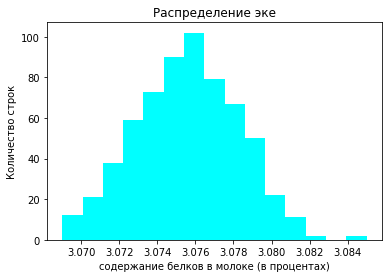

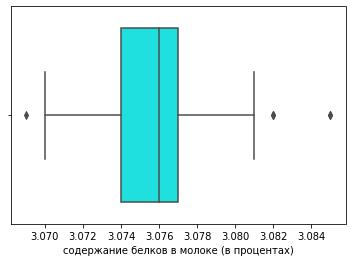

In [1068]:
ferma_main['белок'].plot(kind='hist',bins = 15,color = 'cyan',)
plt.xlabel('содержание белков в молоке (в процентах)')
plt.ylabel('Количество строк')
plt.title('Распределение эке')
plt.show()
sns.boxplot(x=ferma_main['белок'],color='cyan')
plt.xlabel('содержание белков в молоке (в процентах)')
plt.show()

На графике видим выбросы в диапазонах: <3.069 и >3.081, так как выбросов мало,можем спокойно избавиться от них, сильно на данные не повлияет

In [1069]:
ferma_main = ferma_main.query('3.069 < белок < 3.081 ')

**Вывод**
* Распределение стремится к нормальному
* Были изначальные выбросы,так как их количество было малым, убрали выбросы, данные готовы

**Общий вывод по исследовательскому анализу данных:**
* Категориальные признаки:
    * Признак: порода
      * Распределение пород нормальное и стремится к соотношению 1:1
      * Вис Бик Айдиал - 373 записи(59.3%), а РефлешнСоверинг - 256 записей(40.7%)
      * С данными никакие действия не будем делать
    * Признак: тип пастбища
      * Распределение по типу пастбищ еще сильнее стремится к соотношению 1 к 1.
      * Холмистая - 351 запись(55.8%), равнинная - 278 записей(44.2%)
      * С данными ничего делать не будем
    * Признак: порода папы
      * Распределение по породе папы вовсе близко к соотношению 1 к 1.
      * Айдиал - 318 записей(50.6%), Соверин - 311 записей(49.4%)
      * Данные не меняем
    * Признак: вкус молока
      * Распределение,конечно, далеко от распределение 1 к 1, но приемлимо, чтобы не проводить никаких изменений с данными
      * Вкусно - 371 запись(58.99%), не вкусно - 258 записей (41.01%)
    * Признак: возраст
      * Распределение связано скорее всего с тем, что на ферме, молодых животных просто напросто меньше, чем тех кто живет уже там давно.
      * Более 2 лет - 519 записей(82.5%), менее 2 лет - 110 записей(17.4%)
      * Распределение по всем категориальным признакам приемлимое, данные менять не будем, выбросов по количеству какого то определенного признака не наблюдается
* Колличественные признаки:
    * Признак - удой
      * Избавились от выброса,в среднем строки имеют значение  6125.9
      * Само распределение стремится к нормальному
    * Признак ЭКЕ
      * Аномальные значения отсутствуют,в среднем строки имеют значение 14.5
      * Распределение признака стремится к нормальному, данные готовы
    * Признак сырой протеин
      * Распределение стремится тоже к нормальному,но при этом, строк где количество сырого протеина меньше 2100 г, больше.
      * Выбросы отсутствуют,в среднем строки имеют значение 1923.7
    * Признак - спо
      * Распределение хоть и скорее всего не нормальное, но данный момент можно списать на то, что это показатель отношения одного к другому.
      * Аномальные значения отсутствуют, в среднем строки имеют значение 0.913089
    * Признак - жирность
      * Есть множество выбросов,находящиеся в значении жирности ниже 3.4, при этом доля этих пропусков являются слишком большой, чтобы просто убрать их, ведь даже замена медианным значением сильно повлияет на данные. Оставим данные выбросы.
      * В среднем строки имеют значение 3.6
    * Признак - ЭКЕ
      * Распределение стремится к нормальному
      * Были изначальные выбросы,так как их количество было малым, убрали выбросы, данные готовы
Данные готовы!

## 4 Корреляционный анализ

#### 4.1 Изучим взаимосвязь между признаками

interval columns not set, guessing: ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


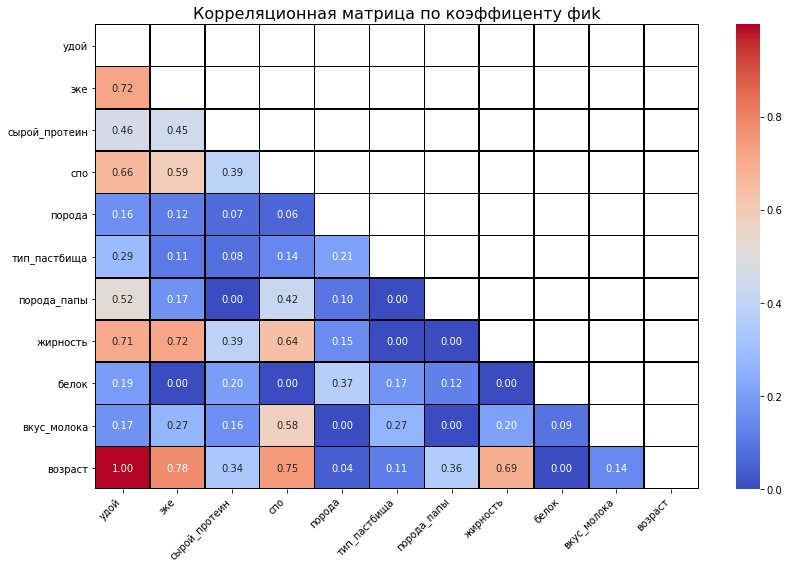

In [1070]:
correlation_matrix = ferma_main.drop('id', axis=1).phik_matrix()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Настройка графика
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, linewidths=.5, linecolor='black')
plt.title("Корреляционная матрица по коэффиценту фиk", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Поворачиваем метки по оси X для лучшей читаемости
plt.yticks(rotation=0)  # Убираем поворот меток по оси Y
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

#### Построим диаграммы рассеяния 

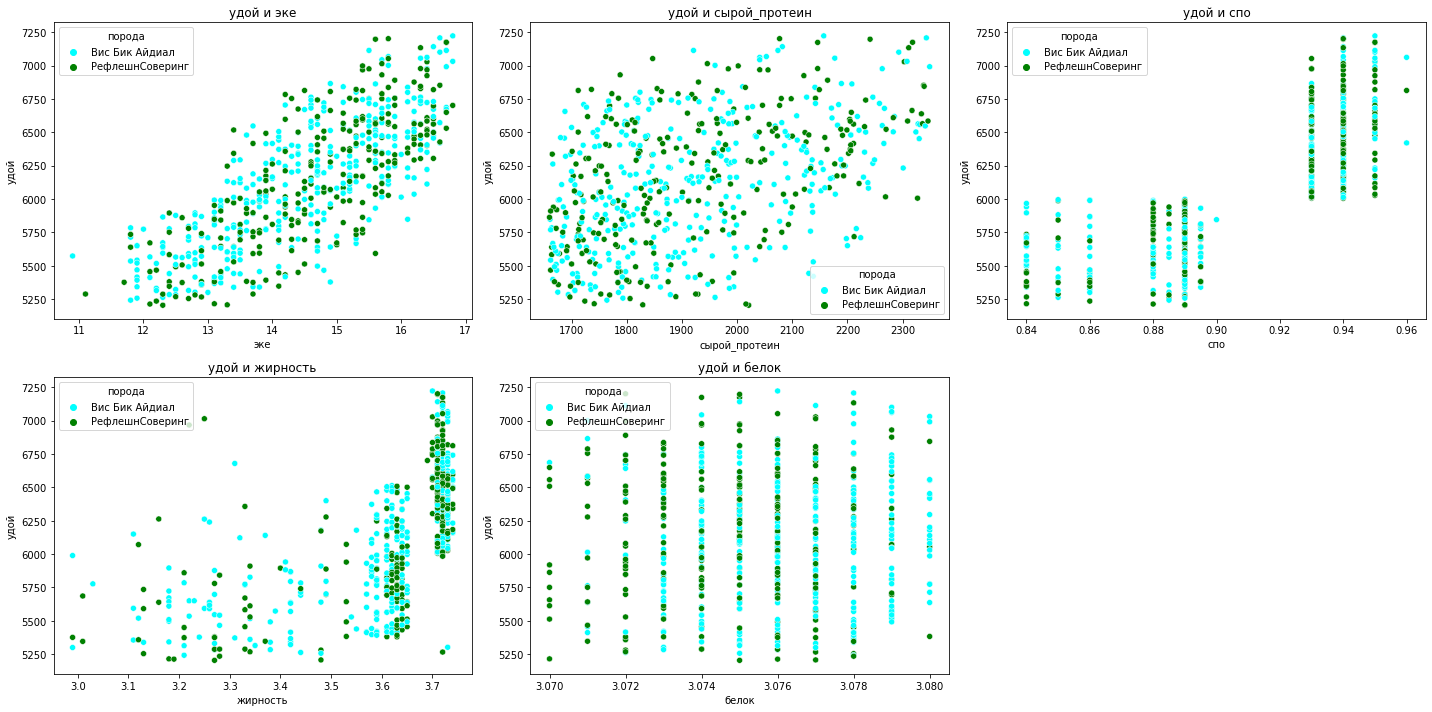

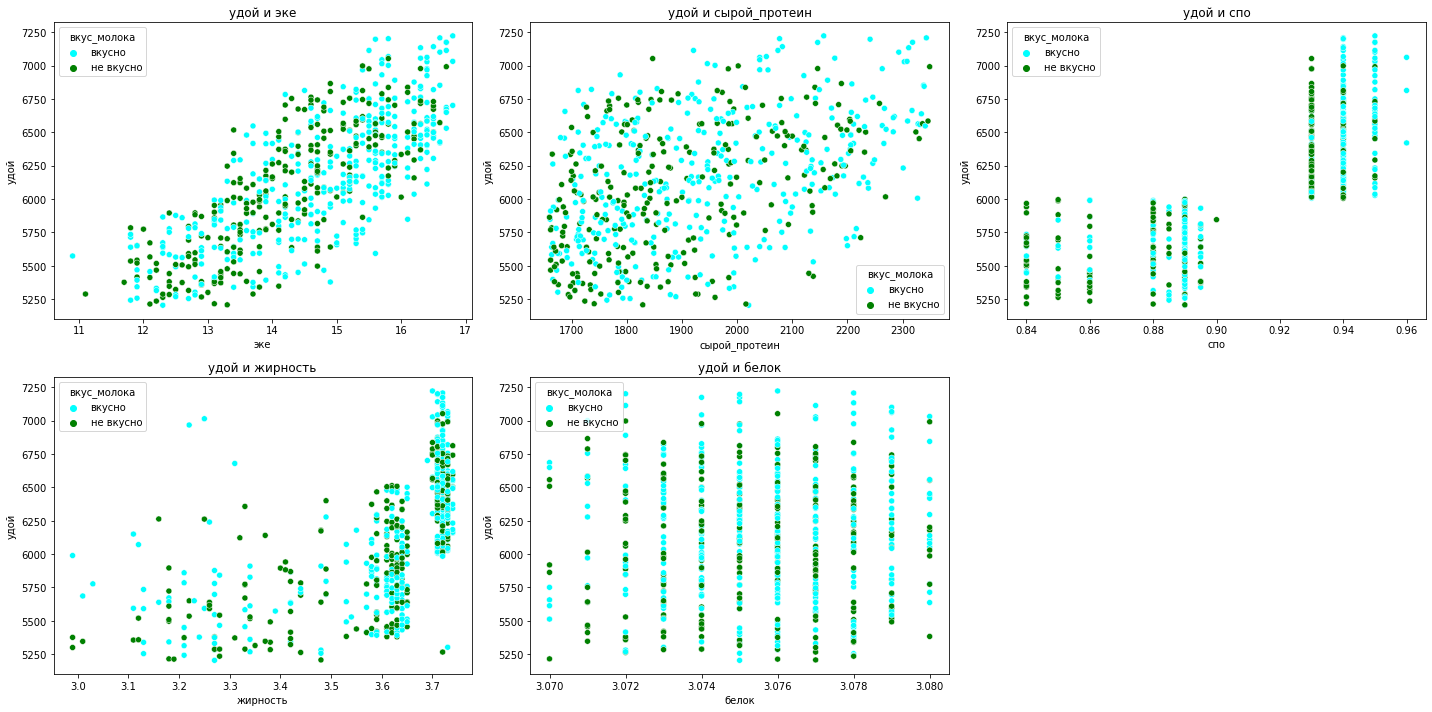

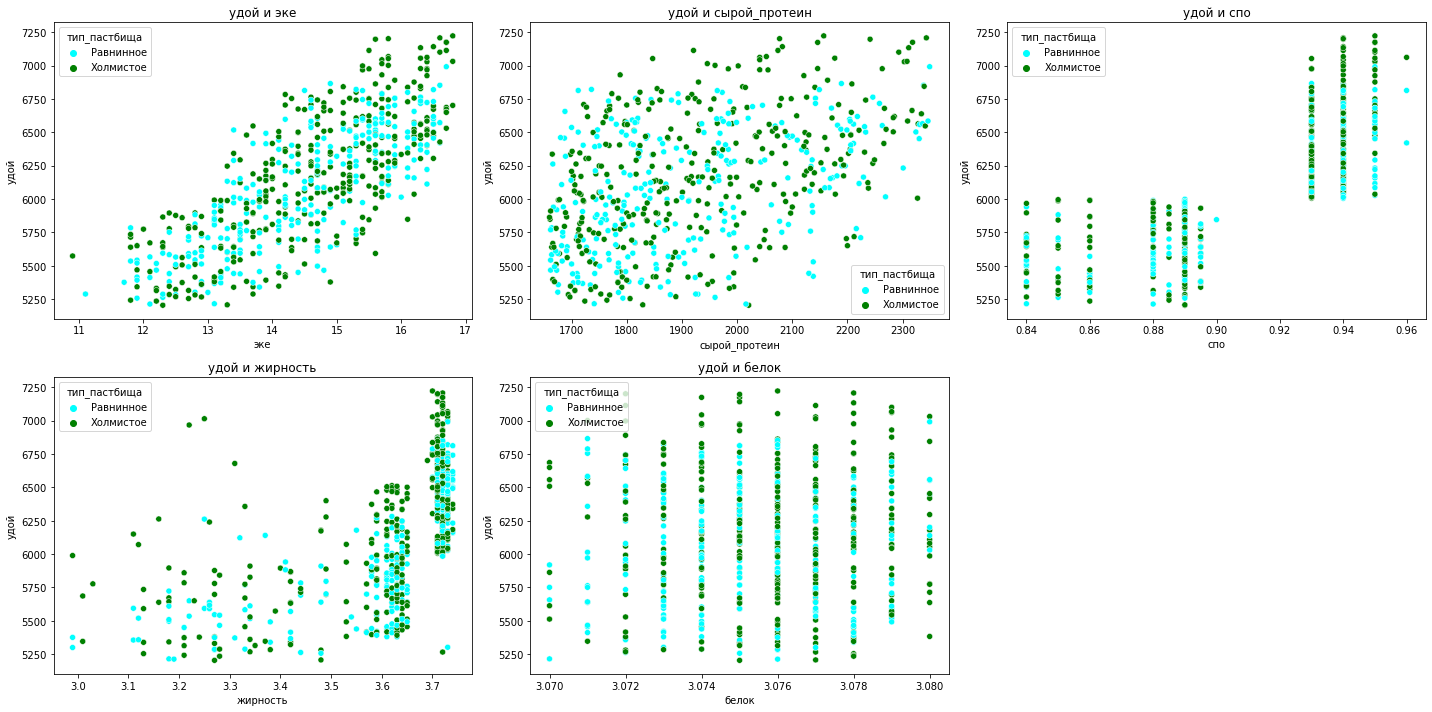

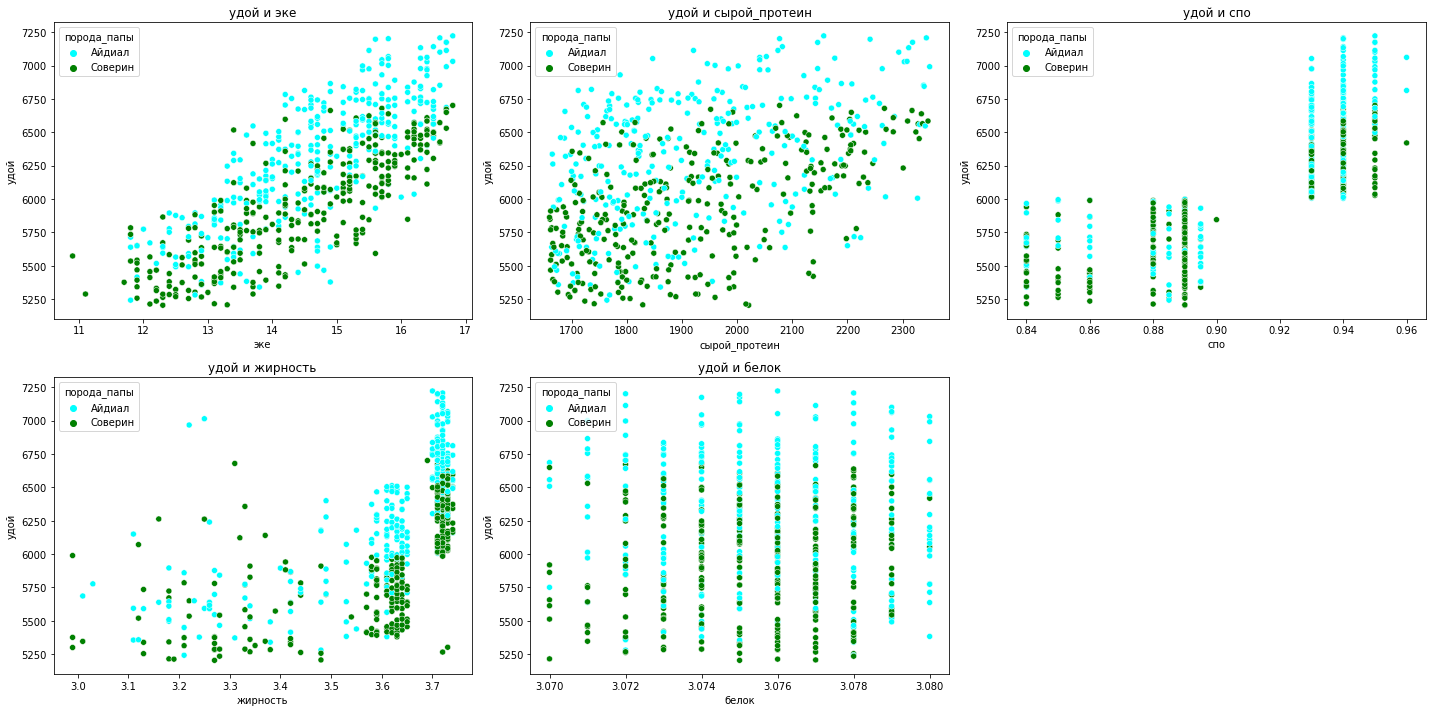

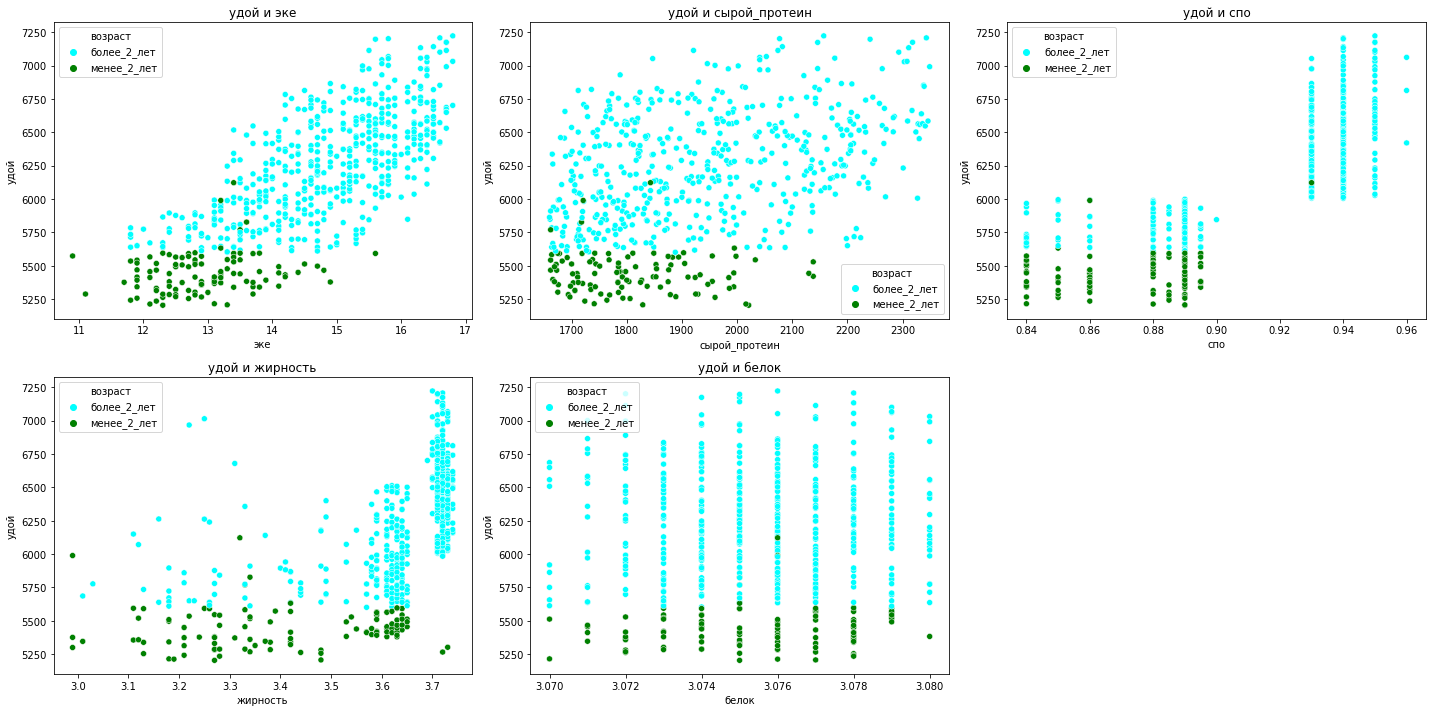

In [1071]:
#создадим функцию которая будет строить диаграммы рассеяния для заданных колличественных признаков
def plot_scatter_matrix(df, quantitative_features, target_variable, hue_variable):
    plt.figure(figsize=(20, 10))
    for i, feature in enumerate(quantitative_features, 1):
        plt.subplot(2, 3, i)
        sns.scatterplot(data=df, x=feature, y=target_variable, hue=hue_variable, palette=['cyan', 'green'])
        plt.title(f'{target_variable} и {feature}')

    plt.tight_layout()
    plt.show()

# создадим список для которого и будет использоваться функция
scatter = ['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']
#Рассмотрим диаграммы рессеяния по признакам -  вкус молока и порода(вкус молока добавим так как есть колличественные признаки белок и жирность,которые относятся к моловку)
plot_scatter_matrix(ferma_main, scatter, 'удой', 'порода')
plot_scatter_matrix(ferma_main,scatter,'удой','вкус_молока')
plot_scatter_matrix(ferma_main,scatter,'удой','тип_пастбища')
plot_scatter_matrix(ferma_main,scatter,'удой','порода_папы')
plot_scatter_matrix(ferma_main,scatter,'удой','возраст')


**Общий вывод**
* В ходе исследования целевого признака(удоя) описали корреляцию между ним и другими колличественными признаками
* Удой и ЭКЕ
    * Коэффицент корреляции 0.72, что и показывает график, с увеличением удоя повышается и ЭКЕ,причем данное высказывание справедливо для обеих пород
* Удой и сырой протеин
    * Коэффицент корреляции равен 0.46, связь менее сильная,но все же есть и является линейной,на графике можно пропорциональность значений.
* Удой и СПО
    * Коэффицент корреляции - 0.66, по графику можно сказать, что связь **нелинейная**,но при этом сильная,также на графике видно общее повышение значений которые больше 0.9
* Удой и жирность
    *  Коэффицент корреляции - 0.71. Взаимосвязь **нелинейная**,причем лучше всего ее видно при значениях >3.6.
* Удой и белок
    * Коэффицент корреляции - 0.19, связь между этим признаком и целевой переменной является **нелинейной**. Однако наблюдается зависимость между признаком "белок" и породой: при низких значениях "белка" преобладает порода РефлешнСоверинг, в то время как при высоких значениях наблюдается увеличение доли породы Вис Бик Айдиал.
* Удой и возраст
    * Коэффицент корреляции - 1, взаимосвязь сильная и линейная.
* Линейная связь наблюдается между целевым признаком и входными признаками: эке, сырой протеин;
* В основном между входными и целевым признаком существует линейная связь, но при этом есть и нелинейные связи между признаками: удой - СПО, жирность, белок
* Сильная корреляция наблюдается между целевым признаком и входными признаками: ЭКЕ, СПО, возраст
* Умеренная корреляция наблюдается между целевым признаком и входными признаками: сырой протеин(г), порода папы;
* С помощью корреляционной матрицы можно заметить, что между признаками существует взаимосвязь, но при этом каких-либо ярких причин для утверждения о мультиколлинеарности нет. 

## 5 Обучение модели линейной регрессии

### 5.1 Создадим 3 модели

**Модель 1**

Отберем признаки, которые подходят для модели линеьйной регрессии:
* Признаки вкус молока, жирность,id и белок следует убрать,так как оба признака не связаны с целевым, тем более связи белка с удоем фактически нет.
* Все остальные признаки следует оставить.

In [1072]:
X = ferma_main[['эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища', 'возраст', 'порода_папы']]
y = ferma_main['удой']

Разобъем выборки

In [1073]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(459, 7)
(153, 7)
(459,)
(153,)


Закодируем категориальные признаки с помощью OneHotEncoder и масштабируем колличественные признаки с помощью StandardScaler

In [1074]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['порода', 'тип_пастбища','возраст', 'порода_папы']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
num_col_names = ['эке', 'сырой_протеин', 'спо']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучим модель

In [1075]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
r2=r2_score(y_test, predictions) 
mse_1 = mean_squared_error(y_test, predictions, squared = False) 
msq_1 = mean_squared_error(y_test, predictions)
mae_1 = mean_absolute_error(y_test, predictions) 
print('R2_score модели:',r2)

R2_score модели: 0.7953683335703937


Чем ближе сама метрика к единице,тем меньше она ошибается и значение 0.79 на самом деле неплохое,но тем не менее не столь близко к 1,так что следует провести анализ остатков.

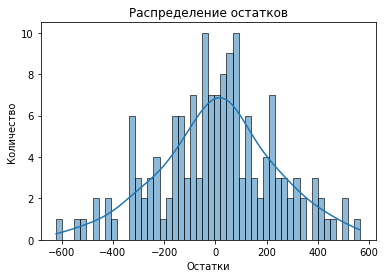

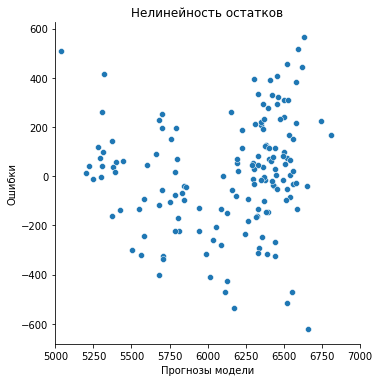

In [1076]:
#Остатки
res1 = y_test-predictions
sns.histplot(data=res1,kde=True,bins=50)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.show()
#Нелинейность остатков
sns.relplot(x=predictions,y=res1)
plt.xlabel('Прогнозы модели')
plt.ylabel('Ошибки')
plt.title('Нелинейность остатков')
plt.xlim(5000,7000)
plt.show()

Остатки имеют несколько пиков в своем распределении, при этом можно заметить,что после 6000 разброс увеличивается, скорее всего у этого есть какая то связь, стоит доработать модель

**Вывод**
* R2 score модели равен 0.795, модель ошибается,но не все так плохо
* На шаге разбития выборки,были удалены признаки не связаны с удоем: жирность,белки,вкус молока,id
* Остатки распределены с пиками,можно улучшить модель

**Модель 2**

Преобразуем признаки для улучшения модели

In [1077]:
ferma_main.loc[ferma_main['спо'] >= 0.92, 'спо'] = 1
ferma_main.loc[ferma_main['спо'] < 0.92, 'спо'] = 0
ferma_main['эке_2'] = ferma_main['эке'].apply(lambda x: x**2)
ferma_main

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,эке_2
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,1.0,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16
625,626,5513,12.9,1700,0.0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41
626,627,5970,14.4,1837,0.0,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36
627,628,5746,13.8,1994,0.0,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44


Разбиваем выборку

In [1078]:
X = ferma_main[['эке_2', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища', 'возраст', 'порода_папы']]
y = ferma_main['удой']

In [1079]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(459, 7)
(153, 7)
(459,)
(153,)


Закодируем категориальные признаки с помощью OneHotEncoder и масштабируем колличественные признаки с помощью StandardScaler

In [1080]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['спо', 'порода', 'тип_пастбища', 'возраст', 'порода_папы']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой_протеин']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучим модель

In [1081]:
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions = model_lr_2.predict(X_test)
r2=r2_score(y_test, predictions) 
mse_2 = mean_squared_error(y_test, predictions, squared = False) 
msq_2 = mean_squared_error(y_test, predictions)
mae_2 = mean_absolute_error(y_test, predictions) 
print('R2_score модели:',r2)

R2_score модели: 0.8316394873761661


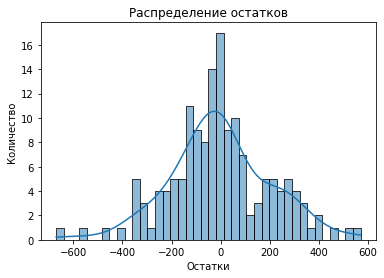

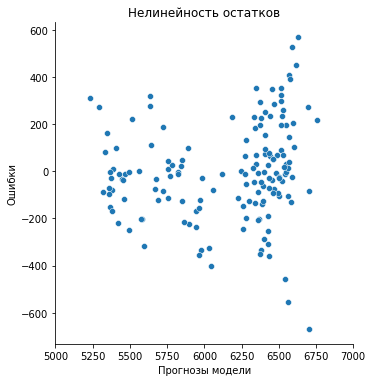

In [1082]:
#Остатки
res2 = y_test-predictions
sns.histplot(data=res2,kde=True,bins=40)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.show()
#Нелинейность остатков
sns.relplot(x=predictions,y=res2)
plt.xlabel('Прогнозы модели')
plt.ylabel('Ошибки')
plt.title('Нелинейность остатков')
plt.xlim(5000,7000)
plt.show()

Распределение все ближе к нормальному,но остается бимодальным, но конечно результат в этой модели лучше,даже если смотреть на распределение остатков

**Вывод:**
* R2 score улучшился и теперь равен 0.831,тем не менее есть куда стремится.
* Вторая модель лучше чем первая
* Распределение остатков тут бимодальное,все ближе к нормальному

**Модель 3**

Добавим столбец с именем папы из датафрейма ferma_dad

In [1083]:
ferma = ferma_main.merge(ferma_dad, on='id', how='left')
X = ferma[['эке_2', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища', 'возраст', 'порода_папы', 'имя_папы']]
y = ferma['удой']
ferma.head()

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы,жирность,белок,вкус_молока,возраст,эке_2,имя_папы
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин


Разобъем выборку

In [1084]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(459, 8)
(153, 8)
(459,)
(153,)


Закодируем и смасштабируем

In [1085]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_col_names = ['спо', 'порода', 'тип_пастбища', 'возраст', 'порода_папы', 'имя_папы']
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой_протеин']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Обучим

In [1086]:
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions = model_lr_3.predict(X_test)
r3=r2_score(y_test, predictions) 
mse_3 = mean_squared_error(y_test, predictions, squared = False) 
msq_3 = mean_squared_error(y_test, predictions)
mae_3 = mean_absolute_error(y_test, predictions) 
print('R2_score модели:',r3)

R2_score модели: 0.8457081491943992


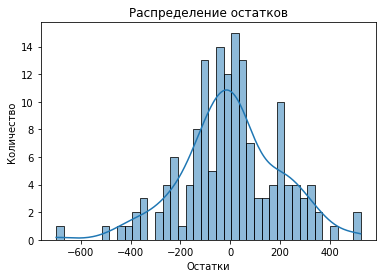

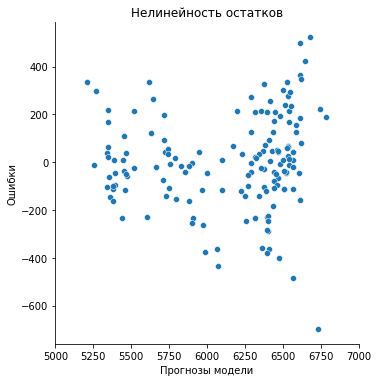

In [1087]:
#Остатки
res3 = y_test-predictions
sns.histplot(data=res3,kde=True,bins=40)
plt.title('Распределение остатков')
plt.xlabel('Остатки')
plt.ylabel('Количество')
plt.show()
#Нелинейность остатков
sns.relplot(x=predictions,y=res3)
plt.xlabel('Прогнозы модели')
plt.ylabel('Ошибки')
plt.title('Нелинейность остатков')
plt.xlim(5000,7000)
plt.show()

**Вывод:**
* Модель улучшилась после добавление нового признака
* Метрика R2 score немного увеличилась и теперь равна 0.846,да,не существенно,но тем не менее модель стала меньше ошибаться
* Распределение остатков имеет почти нормальное распределение,существуют выбросы,но в принципе диаграмма рассеяния приняла хороший вид

Посмотрим на другие метрики 

In [1088]:
metrics = {
    'Модель':[1,2,3],
    'MSE': [mse_1, mse_2, mse_3],
    'RMSE': [msq_1, msq_2, msq_3],
    'MAE': [mae_1, mae_2, mae_3],
}

metrics_table = pd.DataFrame(metrics)
print(metrics_table)

   Модель         MSE          RMSE         MAE
0       1  225.174207  50703.423321  174.408278
1       2  204.245426  41716.194229  153.955360
2       3  195.525640  38230.275709  147.077980


In [1089]:
# Посчитаем 95% доверительный интервал лучшей модели 
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))

95% доверительный интервал = (6068.076877421743, 6208.754596436998)


Сравнивая все метрики выше,видим, что, третья модель показала себя лучше во всех метриках.

Поэтому для прогнозирования удоя коров будем использовать именно третью модель

**Добавим признаки**

In [1090]:
cow_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


In [1091]:
eke = ferma_main['эке'].mean()
spo = ferma_main['спо'].mean()
sp = ferma_main['сырой_протеин'].mean()
cow_buy['эке'] = eke * 1.05
cow_buy['сырой_протеин'] = sp * 1.05
cow_buy['спо'] = spo * 1.05
cow_buy_copy = cow_buy.copy()

In [1092]:
cow_buy_copy['спо'] = cow_buy['спо'].apply(lambda x: 'менее_0.92' if x < 0.92 else 'более_0.92')
cow_buy_copy['эке_2'] = cow_buy['эке'].apply(lambda x: x**2)

In [1093]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='error')
cat_col_names = ['спо', 'порода', 'тип_пастбища', 'возраст', 'порода_папы', 'имя_папы']
cow_buy_ohe = encoder.fit_transform(cow_buy_copy[cat_col_names])
encoder_col_names = encoder.get_feature_names()

cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)
scaler = StandardScaler()
num_col_names = ['эке_2', 'сырой_протеин']
cow_buy_scaled = scaler.fit_transform(cow_buy_copy[num_col_names])

cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)
cow_buy_new = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)
cow_buy_new.insert(loc=0,
                   column='x0_менее_0.92',
                   value = 0.0)
cow_buy_new

,x0_менее_0.92,x1_РефлешнСоверинг,x2_Холмистое,x3_менее_2_лет,x4_Соверин,x5_Буйный,x5_Геркулес,x5_Соловчик,эке_2,сырой_протеин
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [1094]:
cow_buy_new.columns = ['спо_менее_0.92',
                       'порода_Соверинг',
                       'тип пастбища_холмистое',
                       'возраст_менее_2_лет',
                       'порода папы_Соверинг',
                       'имя папы_Буйный',
                       'имя папы_Геркулес',
                       'имя папы_Соловчик',
                       'эке_2',
                       'сырой протеин(г)']

cow_buy['удой(кг)'] = model_lr_3.predict(cow_buy_new)
cow_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,эке,сырой_протеин,спо,удой(кг)
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271152,2018.417402,0.622794,6121.724997
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271152,2018.417402,0.622794,5857.699864
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271152,2018.417402,0.622794,5824.418855
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271152,2018.417402,0.622794,6133.823243
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271152,2018.417402,0.622794,6075.584871
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271152,2018.417402,0.622794,5894.933459
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271152,2018.417402,0.622794,6082.476595
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271152,2018.417402,0.622794,5909.046512
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271152,2018.417402,0.622794,5899.438344
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271152,2018.417402,0.622794,6119.710190


**Общий вывод:**
* Метрики финальной модели
    * MSE - 195.525640 
    * RMSE - 38230.275709 
    * MAE - 147.077980
    * R2 score - 0.846
* 95% доверительный интервал = (6068.076877421743, 6208.754596436998)
* Были спрогнозированы удои каждой коровы,вероятно,каждая из них больше 5500 кг удоя в год,но еще стоит проверить вкус молока.


## 5 Обучение модели логистической регрессии

Так как ранее мы уже использовали созданный датафрейм ferma_log с нужными признаками,обратимся к нему. В качестве таргета является вкус молока.

В качестве входных признаков выберем те, которые логически обоснованы. К ним относятся состав корма, состав молока, возраст, порода коровы, порода отца, имя отца и тип пастбища. Мы будем опираться на эти признаки.

In [1095]:
ferma_log = ferma_main.copy(deep=True)

Подготовим подходящие признаки

In [1096]:
ferma_log['вкус_молока_кат'] = ferma_log['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_log['спо_кат'] = ferma_log['спо'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_log['эке_2'] = ferma_log['эке'] ** 2

ferma_log = ferma_log.drop(['id', 'удой', 'вкус_молока', 'эке', 'спо'], axis=1)

ferma_log.head()

,сырой_протеин,порода,тип_пастбища,порода_папы,жирность,белок,возраст,эке_2,вкус_молока_кат,спо_кат
0,1743,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет,201.64,1,0
1,2138,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,163.84,1,0
2,1854,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,196.00,0,0
3,2012,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет,153.76,0,0
4,1675,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,163.84,1,0


Выделим признаки,закодируем и масштабируем их.

In [1097]:
X = ferma_log.drop('вкус_молока_кат', axis=1)
y = ferma_log['вкус_молока_кат']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y
)

# Заранее создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_2', 'сырой_протеин']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

Обучим модель и выведем метрики

In [1098]:
clf = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

clf_accuracy = accuracy_score(y_pred, y_valid)
clf_recall = recall_score(y_pred, y_valid)
clf_precision = precision_score(y_pred, y_valid)

print(f'Метрика Accuracy: {clf_accuracy}')
print(f'Метрика Recall: {clf_recall}')
print(f'Метрика Precision: {clf_precision}')

Метрика Accuracy: 0.5947712418300654
Метрика Recall: 0.6216216216216216
Метрика Precision: 0.7752808988764045


Модель правильно предсказывает в 59,4% случаях, результат неплохой, но можно улучшить.
Построим матрицу ошибок

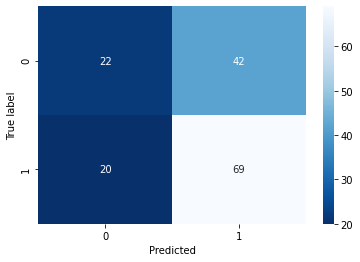

In [1099]:
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

#### Анализ модели логистической регрессии
* При покупке коров критичнее ошибка первого рода (ложноположительное заключение), так как она может привести к покупке коровы, которая не даст вкусного молока, что негативно скажется на производительности. Ошибка второго рода (ложноотрицательное заключение) менее критична, так как в этом случае вы просто упустите потенциально хорошую корову. Ошибки первого и второго рода

* Ошибка первого рода (ложноположительное заключение):
    * Происходит, когда покупатель ошибочно считает корову способной давать вкусное молоко, хотя на самом деле это не так.Это может привести к значительным финансовым потерям, так как покупка некачественной коровы не оправдает ожиданий.
* Ошибка второго рода (ложноотрицательное заключение):
    * Происходит, когда покупатель не распознает хорошую корову, которая могла бы дать вкусное молоко.
В этом случае покупатель просто упустит возможность, но не понесет значительных убытков.
* Исходя из вышесказанных слов, можно сделать вывод, что нам необходимо будет максимизировать метрику Precision. А метрику Recall наоборот уменьшать,так как для нас она наиболее важна.
* Из матрицы ошибок видно, что:
    * в 22 случаях модель правильно отнесла вкусное молоко к категории 'вкусно' (0 == 0)
    * в 20 случаях модель неправильно относла невкусное молоко к категории 'вкусно' (0 != 1)
    * в 42 случаях модель неправильно относла вкусное молоко к категории ' не вкусно' (1 != 0)
    * в 69 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно'.
    * Имеем целых 42 ошибок первого рода, по отношению к 69 верноположительным предсказаниям. Больше половины ошибок: нужно минимизировать их количество

Чтобы справиться с ошибками, необходимо подобрать порог.

In [1100]:
# Выведем вероятности класса predict_proba() и правильные ответы
y_proba = clf.predict_proba(X_valid)[:, 1]

proba_data = pd.DataFrame(zip(y_valid, y_proba),
                          columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

,y_valid,y_proba
71,1,0.846098
117,1,0.844203
141,1,0.839866
133,1,0.835299
51,1,0.821333


Для перебора порогов и расчета метрик напишем функцию.

In [1101]:
def threshold_roll(threshold_list, proba_df):
    result_df = pd.DataFrame(columns=['порог', 'Метрика precision', 'Метрика recall', 'количество_FP', 'предсказанные_объекты',
                                      'всего_объектов_класса_1'])
    for threshold in threshold_list:
        column_name = 'y_pred_' + str(threshold)
        # Precision
        precision = proba_df.loc[proba_df[column_name] == 1, 'y_valid'].mean()
        # Число предсказанных объектов
        predicted_objects = proba_df[column_name].sum()
        # Всего объектов класса 1
        total_objects_class_1 = proba_df['y_valid'].sum()
        # Recall
        recall = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 1)].shape[
                     0] / total_objects_class_1
        # Количество ложноположительных предсказаний (FP)
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 0)].shape[0]
        # Добавим результаты в датафрейм
        result_df = result_df.append({
            'порог': threshold,
            'Метрика precision': precision,
            'Метрика recall': recall,
            'количество_FP': false_positives,
            'предсказанные_объекты': predicted_objects,
            'всего_объектов_класса_1': total_objects_class_1,
        }, ignore_index=True)

    return result_df

Применим нашу функцию

In [1102]:
threshold_roll(thresholds_1, proba_data_1)

,порог,Метрика precision,Метрика recall,количество_FP,предсказанные_объекты,всего_объектов_класса_1
0,0.10,0.581699,1.000000,64.0,153.0,89.0
1,0.19,0.581699,1.000000,64.0,153.0,89.0
2,0.28,0.598639,0.988764,59.0,147.0,89.0
3,0.37,0.592857,0.932584,57.0,140.0,89.0
4,0.46,0.606557,0.831461,48.0,122.0,89.0
5,0.55,0.670103,0.730337,32.0,97.0,89.0
6,0.64,0.750000,0.505618,15.0,60.0,89.0
7,0.73,0.774194,0.269663,7.0,31.0,89.0
8,0.82,1.000000,0.056180,0.0,5.0,89.0
9,0.91,NaN,0.000000,0.0,0.0,89.0


Порог ниже 0.64 приводит к значительному количеству ложноположительных результатов, в то время как значения выше порога 0.73 оказывают чрезмерное влияние на метрику полноты. Давайте более подробно проанализируем этот диапазон.

In [1103]:
#Рассмотрим новый диапазон
proba_data_2 = proba_data.copy(deep=True)

thresholds_2 = [round(i, 2) for i in np.linspace(0.64, 0.73, num=11, endpoint=False)]

columns = []

for i in thresholds_2:
    columns.append('y_pred_' + str(i))
    proba_data_2['y_pred_' + str(i)] = proba_data_2['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data_2.head(5)

,y_valid,y_proba,y_pred_0.64,y_pred_0.65,y_pred_0.66,y_pred_0.67,y_pred_0.68,y_pred_0.69,y_pred_0.7,y_pred_0.71,y_pred_0.72
71,1,0.846098,1,1,1,1,1,1,1,1,1
117,1,0.844203,1,1,1,1,1,1,1,1,1
141,1,0.839866,1,1,1,1,1,1,1,1,1
133,1,0.835299,1,1,1,1,1,1,1,1,1
51,1,0.821333,1,1,1,1,1,1,1,1,1


In [1104]:
threshold_roll(thresholds_2, proba_data_2)

,порог,Метрика precision,Метрика recall,количество_FP,предсказанные_объекты,всего_объектов_класса_1
0,0.64,0.750000,0.505618,15.0,60.0,89.0
1,0.65,0.745763,0.494382,15.0,59.0,89.0
2,0.66,0.759259,0.460674,13.0,54.0,89.0
3,0.66,0.759259,0.460674,13.0,54.0,89.0
4,0.67,0.754717,0.449438,13.0,53.0,89.0
5,0.68,0.770833,0.415730,11.0,48.0,89.0
6,0.69,0.795455,0.393258,9.0,44.0,89.0
7,0.70,0.780488,0.359551,9.0,41.0,89.0
8,0.71,0.769231,0.337079,9.0,39.0,89.0
9,0.71,0.769231,0.337079,9.0,39.0,89.0


Можно говорить, что порог 0.68 является наиболее подходящим, поскольку при этом значении мы минимизировали количество ложноположительных результатов до 11, сохранив при этом половину предсказанных ответов. Хотя метрика полноты не достигает высоких значений, наша цель заключается в повышении точности при низком уровне ложноположительных результатов, что и обеспечивает данный порог.

In [1105]:
OPTIMAL_THRESHOLD = 0.68

# Применим порог к предсказанным вероятностям
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

clf_accuracy_new = accuracy_score(y_valid, y_pred_threshold)
clf_recall_new = recall_score(y_valid, y_pred_threshold)
clf_precision_new = precision_score(y_valid, y_pred_threshold)

print(f'Old Accuracy: {clf_accuracy}')
print(f'Old Recall: {clf_recall}')
print(f'Old Precision: {clf_precision}')
print('---')
print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')
print('---')


Old Accuracy: 0.5947712418300654
Old Recall: 0.6216216216216216
Old Precision: 0.7752808988764045
---
New Accuracy: 0.5882352941176471
New Recall: 0.4157303370786517
New Precision: 0.7708333333333334
---


Снова просмотрим матрицу ошибок

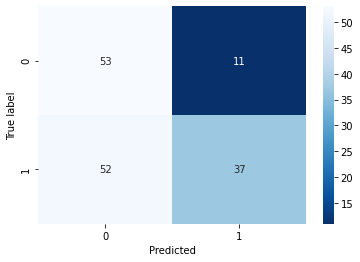

In [1106]:
cm_new = confusion_matrix(y_valid, y_pred_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

* Recall снизилась до 0.4157303370786517, однако количество ложноположительных результатов практически равно нулю, что, безусловно, окажет положительное влияние на общую точность предсказаний.
* Precision значительно возросла и достигла 0.7708333333333334
* Accuracy осталась практически на прежнем уровне — 0.5882352941176471

Теперь мы создадим новую обучающую выборку, обучим нашу модель с учетом нового порога и получим предсказания на тестовой выборке.

In [1107]:
cow_buy_ml_2 = cow_buy.copy(deep=True)

Добавим недостающие признаки в датасет cow_buy и преобразовываем их,в общем подготовим признаки

In [1108]:
mean_values = ferma_main[['эке', 'сырой_протеин', 'спо']].mean()
new_values = mean_values * 1.05
cow_buy_ml_2['эке'] = new_values['эке']
cow_buy_ml_2['эке_2'] = cow_buy_ml_2['эке'] ** 2
cow_buy_ml_2['сырой_протеин'] = new_values['сырой_протеин']
cow_buy_ml_2['спо'] = new_values['спо']
cow_buy_ml_2['спо_кат'] = cow_buy_ml_2['спо'].apply(lambda x: 1 if x > 0.91 else 0)
cow_buy_ml_2.rename(columns={'текущая_жирность': 'жирность', 'текущий_белок': 'белок'}, inplace=True)
cow_buy_ml_2 = cow_buy_ml_2.drop(['имя_папы', 'эке', 'спо'], axis=1)
cow_buy_ml_2.head()

,порода,тип_пастбища,порода_папы,жирность,белок,возраст,сырой_протеин,удой(кг),эке_2,спо_кат
0,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,2018.417402,6121.724997,233.208082,0
1,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,2018.417402,5857.699864,233.208082,0
2,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,2018.417402,5824.418855,233.208082,0
3,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,2018.417402,6133.823243,233.208082,0
4,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,2018.417402,6075.584871,233.208082,0


Подготовим признаки, закодируем категориальные признаки и масштабируем колличественные.

In [1109]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы', 'возраст', 'спо_кат']
num_col_names = ['жирность', 'белок', 'эке_2', 'сырой_протеин']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_ml_2[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_ml_2[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Теперь обучим модель

In [1110]:
clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
predictions_final = (y_proba > OPTIMAL_THRESHOLD).astype(int)

Добавим предсказания в датафрейм

In [1111]:
cow_buy['ожидаемый_вкус_молока'] = predictions_final
cow_buy['ожидаемый_вкус_молока'] = cow_buy['ожидаемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
to_buy = cow_buy.query('ожидаемый_вкус_молока == "вкусно"')
cow_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,эке,сырой_протеин,спо,удой(кг),ожидаемый_вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271152,2018.417402,0.622794,6121.724997,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271152,2018.417402,0.622794,5857.699864,вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271152,2018.417402,0.622794,5824.418855,вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271152,2018.417402,0.622794,6133.823243,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271152,2018.417402,0.622794,6075.584871,вкусно
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271152,2018.417402,0.622794,5894.933459,не вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271152,2018.417402,0.622794,6082.476595,вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271152,2018.417402,0.622794,5909.046512,вкусно
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271152,2018.417402,0.622794,5899.438344,не вкусно
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271152,2018.417402,0.622794,6119.710190,не вкусно


Теперь можно вывести тех коров,чье молоко вкусное

In [1112]:
to_buy

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,эке,сырой_протеин,спо,удой(кг),ожидаемый_вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271152,2018.417402,0.622794,6121.724997,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271152,2018.417402,0.622794,5857.699864,вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271152,2018.417402,0.622794,5824.418855,вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271152,2018.417402,0.622794,6075.584871,вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271152,2018.417402,0.622794,6082.476595,вкусно
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271152,2018.417402,0.622794,5909.046512,вкусно
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,15.271152,2018.417402,0.622794,5633.214576,вкусно
15,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.271152,2018.417402,0.622794,6133.823243,вкусно
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.271152,2018.417402,0.622794,5899.438344,вкусно


Выведем тех коров, которых фермеру стоит купить:

In [1113]:
cow_buy.loc[(cow_buy['удой(кг)'] > 6000) & (cow_buy['ожидаемый_вкус_молока'] == 'вкусно')]

,порода,тип_пастбища,порода_папы,имя_папы,текущая_жирность,текущий_белок,возраст,эке,сырой_протеин,спо,удой(кг),ожидаемый_вкус_молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271152,2018.417402,0.622794,6121.724997,вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271152,2018.417402,0.622794,6075.584871,вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271152,2018.417402,0.622794,6082.476595,вкусно
15,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.271152,2018.417402,0.622794,6133.823243,вкусно


**Общий вывод:**
* Подобрали хороший порог и тем самым справились с ошибкой 2 рода
* Всего фермеру стоит купить 4 коровы, удой этих коров будет более 6000 кг в год, а молоко у всех из них будет вкусное
* Обучили модель логистической регрессии


## Итоговые выводы

В ходе проекта были сделаны следующие шаги:
* **Загрузка данных**
    * Общий вывод по информации о данных
    * Датафрейм ferma_main
        * Состоит из 634 строк и 12 столбцов
        * Значения соответствуют типам данных
        * Пропуски не обнаружены
        * Количество явных дубликатов: 5
        * Стоит поменять названия столбцов и привести их к одному стилю
    * Датафрейм ferma_dad
        * Состоит из 629 строк и 2 столбцов
        * Значения соответствуют типам данных
        * Пропуски не обнаружены
        * Дубликаты не обнаружены
        * Стоит поменять названия столбцов и привести их к одному стилю
    * Датафрейм cow_buy
        * Состоит из 20 строк и 7 столбцов
        * Значения соответствуют типам данных
        * Пропуски не обнаружены
        * Количество явных дубликатов: 4
        * Стоит поменять названия столбцов и привести их к одному стилю
* **Предобработка данных** 
    * Выявлены и изменены неявные дубликаты в датафрейме ferma_main
    * В датафрейме cow_buy были изменены значения,а именно первые буквы были переведены в верхний регист,для дальнейшего удобства
    * Удалены явные дубликаты в датафреймах ferma_main и cow_buy
* **Исследовательский анализ данных**
    * Категориальные признаки:
    * Признак: порода
      * Распределение пород нормальное и стремится к соотношению 1:1
      * Вис Бик Айдиал - 373 записи(59.3%), а РефлешнСоверинг - 256 записей(40.7%)
      * С данными никакие действия не будем делать
    * Признак: тип пастбища
      * Распределение по типу пастбищ еще сильнее стремится к соотношению 1 к 1.
      * Холмистая - 351 запись(55.8%), равнинная - 278 записей(44.2%)
      * С данными ничего делать не будем
    * Признак: порода папы
      * Распределение по породе папы вовсе близко к соотношению 1 к 1.
      * Айдиал - 318 записей(50.6%), Соверин - 311 записей(49.4%)
      * Данные не меняем
    * Признак: вкус молока
      * Распределение,конечно, далеко от распределение 1 к 1, но приемлимо, чтобы не проводить никаких изменений с данными
      * Вкусно - 371 запись(58.99%), не вкусно - 258 записей (41.01%)
    * Признак: возраст
      * Распределение связано скорее всего с тем, что на ферме, молодых животных просто напросто меньше, чем тех кто живет уже там давно.
      * Более 2 лет - 519 записей(82.5%), менее 2 лет - 110 записей(17.4%)
      * Распределение по всем категориальным признакам приемлимое, данные менять не будем, выбросов по количеству какого то определенного признака не наблюдается
    * Колличественные признаки:
    * Признак - удой
      * Избавились от выброса,в среднем строки имеют значение  6125.9
      * Само распределение стремится к нормальному
    * Признак ЭКЕ
      * Аномальные значения отсутствуют,в среднем строки имеют значение 14.5
      * Распределение признака стремится к нормальному, данные готовы
    * Признак сырой протеин
      * Распределение стремится тоже к нормальному,но при этом, строк где количество сырого протеина меньше 2100 г, больше.
      * Выбросы отсутствуют,в среднем строки имеют значение 1923.7
    * Признак - спо
      * Распределение хоть и скорее всего не нормальное, но данный момент можно списать на то, что это показатель отношения одного к другому.
      * Аномальные значения отсутствуют, в среднем строки имеют значение 0.913089
    * Признак - жирность
      * Есть множество выбросов,находящиеся в значении жирности ниже 3.4, при этом доля этих пропусков являются слишком большой, чтобы просто убрать их, ведь даже замена медианным значением сильно повлияет на данные. Оставим данные выбросы.
      * В среднем строки имеют значение 3.6
    * Признак - ЭКЕ
      * Распределение стремится к нормальному
      * Были изначальные выбросы,так как их количество было малым, убрали выбросы, данные готовы
* **Корреляционный анализ данных**
    * В ходе исследования целевого признака(удоя) описали корреляцию между ним и другими колличественными признаками
    * Удой и ЭКЕ
        * Коэффицент корреляции 0.72, что и показывает график, с увеличением удоя повышается и ЭКЕ,причем данное высказывание справедливо для обеих пород
    * Удой и сырой протеин
        * Коэффицент корреляции равен 0.46, связь менее сильная,но все же есть и является линейной,на графике можно пропорциональность значений.
    * Удой и СПО
        * Коэффицент корреляции - 0.66, по графику можно сказать, что связь **нелинейная**,но при этом сильная,также на графике видно общее повышение значений которые больше 0.9
    * Удой и жирность
        *  Коэффицент корреляции - 0.71. Взаимосвязь **нелинейная**,причем лучше всего ее видно при значениях >3.6.
    * Удой и белок
        * Коэффицент корреляции - 0.19, связь между этим признаком и целевой переменной является **нелинейной**. Однако наблюдается зависимость между признаком "белок" и породой: при низких значениях "белка" преобладает порода РефлешнСоверинг, в то время как при высоких значениях наблюдается увеличение доли породы Вис Бик Айдиал.
    * Удой и возраст
        * Коэффицент корреляции - 1, взаимосвязь сильная и линейная.
    * Линейная связь наблюдается между целевым признаком и входными признаками: эке, сырой протеин;
    * В основном между входными и целевым признаком существует линейная связь, но при этом есть и нелинейные связи между признаками: удой - СПО, жирность, белок
    * Сильная корреляция наблюдается между целевым признаком и входными признаками: ЭКЕ, СПО, возраст
    * Умеренная корреляция наблюдается между целевым признаком и входными признаками: сырой протеин(г), порода папы;
    * С помощью корреляционной матрицы можно заметить, что между признаками существует взаимосвязь, но при этом каких-либо ярких причин для утверждения о мультиколлинеарности нет. 
* **Обучение модели линейной регрессии**
    *Метрики финальной модели
        * MSE - 195.525640
        * RMSE - 38230.275709
        * MAE - 147.077980
        * R2 score - 0.846
        * 95% доверительный интервал = (6068.076877421743, 6208.754596436998)
    * Были спрогнозированы удои каждой коровы,вероятно,каждая из них больше 5500 кг удоя в год,но еще стоит проверить вкус молока.
* **Обучение модели логистической регрессии**
        * Всего фермеру стоит купить 4 коровы, удой этих коров будет более 6000 кг в год, а молоко у всех из них будет вкусное
        * Обучили модель, справились с ошибкой 2 рода
* Модель линейной регрессии: снижение нелинейности между входными признаками и целевой переменной, а также добавление новых входных признаков могут положительно сказаться на модели линейной регрессии. В данной ситуации улучшение модели линейной регрессии может быть достигнуто за счет увеличения количества входных признаков, хотя это не всегда гарантирует успех. Дополнительные параметры корма для коров могли бы стать полезными признаками. Однако, учитывая отсутствие других доступных признаков, добиться более высокой точности модели становится довольно сложной задачей. Для оценки качества модели линейной регрессии был использован коэффициент детерминации, который показывает, насколько наша модель превосходит простое предсказание, основанное на среднем значении. В данном случае все три варианта показали достаточную точность для практического применения. Выводы о точности моделей также основывались на анализе остатков, который позволяет оценить влияние изменений во входных признаках. В некоторых случаях можно дополнительно применять такие метрики, как среднеквадратичная ошибка (MSE) и средняя абсолютная ошибка (MAE).
* Модель логистической регрессии использовалась для определения качественного признака - 'вкус'. Основная цель заключалась в минимизации наиболее значимой для заказчика ошибки (первого или второго рода). Для оценки качества модели логистической регрессии применялись такие метрики, как точность (Accuracy), точность положительных предсказаний (Precision) и полнота (Recall). В зависимости от того, какая ошибка модели вызывает большее беспокойство, корректировались Precision или Recall путем изменения порога классификации. Для решения данной задачи я преобразовал значения признака 'вкус' в бинарные значения: 1 - молоко невкусное; 0 - молоко вкусное.
    * Для заказчика было критически важно приобретать только тех коров, которые производят вкусное молоко. В терминах 0 и 1 это означало, что необходимо минимизировать ошибку второго рода, когда модель предсказывает 0, хотя на самом деле должно быть 1. Эта ошибка называется ложным отрицанием (False Negative), и за нее отвечает метрика Recall. Для снижения количества ложных отрицаний был проведен анализ оптимального порога классификации, при котором Recall равен 1. Оптимальным значением оказался порог 0,211. Однако для предложенной выборки коров при этом пороге модель предсказала невкусное молоко для всех коров. Чтобы фермер не остался без покупки, было предложено увеличить порог классификации до 0,35, что также привело к увеличению ошибки. Улучшить модель логистической регрессии можно так же, как и в случае с линейной регрессией, добавляя дополнительные входные признаки. Если рассматривать вариант с порогом классификации 0,211, то стоит использовать большее количество коров для продажи. Это обеспечит фермеру возможность приобрести корову, которая гарантированно будет давать вкусное молоко.